In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import  DATE_GS_CUTOFF
from definitions.constants_V import SINGLE_RUN_STOCK_DICT_PKL_V, SINGLE_RUN_RETURNS_PKL_V

with open(SINGLE_RUN_RETURNS_PKL_V, 'rb') as f:
    returns = pickle.load(f)


In [10]:
with open(SINGLE_RUN_STOCK_DICT_PKL_V, 'rb') as f:
    dictt = pickle.load(f)

dictt

{'2007-01-31': array(['AAPL', 'CSCO', 'GOOG', 'C', 'QCOM', 'SLB', 'WMT', 'MSFT', 'GE',
        'GS'], dtype=object),
 '2007-02-28': array([], dtype=float64),
 '2007-03-30': array([], dtype=float64),
 '2007-04-30': array(['AAPL', 'VLO', 'QCOM', 'GOOG', 'GE', 'SLB', 'CSCO', 'MSFT', 'WMT',
        'OIH'], dtype=object),
 '2007-05-31': array(['AAPL', 'GOOG', 'VLO', 'C', 'GE', 'OIH', 'SLB', 'ORCL', 'WMT',
        'QCOM'], dtype=object),
 '2007-06-29': array([], dtype=float64),
 '2007-07-31': array([], dtype=float64),
 '2007-08-31': array([], dtype=float64),
 '2007-09-28': array(['SLB', 'ORCL', 'YHOO', 'C', 'CSCO', 'BAC', 'OIH', 'INTC', 'GE',
        'DBC'], dtype=object),
 '2007-10-31': array(['MSFT', 'YHOO', 'GOOG', 'AAPL', 'ORCL', 'GS', 'INTC', 'GSG', 'DBC',
        'C'], dtype=object),
 '2007-11-30': array([], dtype=float64),
 '2007-12-31': array([], dtype=float64),
 '2008-01-31': array(['BAC', 'VNQ', 'MSFT', 'DBA', 'GSG', 'DBC', 'GLD', 'IEF', 'C',
        'LQD'], dtype=object),
 '2008-0

In [11]:
# dictt
filtered_keys = {k: v for k, v in dictt.items() if k > DATE_GS_CUTOFF}
filtered_keys

{'2018-01-31': array(['VXX', 'NFLX', 'AMZN', 'BABA', 'WFC', 'MSFT', 'JPM', 'BAC', 'NVDA',
        'TSLA'], dtype=object),
 '2018-02-28': array([], dtype=float64),
 '2018-03-29': array([], dtype=float64),
 '2018-04-30': array([], dtype=float64),
 '2018-05-31': array([], dtype=float64),
 '2018-06-29': array([], dtype=float64),
 '2018-07-31': array([], dtype=float64),
 '2018-08-31': array([], dtype=float64),
 '2018-09-28': array([], dtype=float64),
 '2018-10-31': array([], dtype=float64),
 '2018-11-30': array([], dtype=float64),
 '2018-12-31': array([], dtype=float64),
 '2019-01-31': array(['BABA', 'BA', 'NFLX', 'BAC', 'TSLA', 'FB', 'C', 'GLD', 'GOOGL',
        'GOOG'], dtype=object),
 '2019-02-28': array(['BABA', 'BA', 'NFLX', 'TSLA', 'BAC', 'FB', 'C', 'FXI', 'JPM',
        'GLD'], dtype=object),
 '2019-03-29': array(['BABA', 'MU', 'NFLX', 'GOOG', 'FB', 'GOOGL', 'TLT', 'HYG', 'BAC',
        'LQD'], dtype=object),
 '2019-04-30': array([], dtype=float64),
 '2019-05-31': array([], dtype=flo

In [12]:
xiv_count = 0

# Iterate through the dictionary values
for date, tickers in dictt.items():
    if 'XIV' in tickers:
        xiv_count += 1

print(f"The stock ticker 'XIV' appears {xiv_count} times in the dictionary.")

The stock ticker 'XIV' appears 0 times in the dictionary.


/tmp/ipykernel_959289/4187050076.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'XIV' in tickers:


In [13]:
returns[returns.index > '2018-01-01'].head(10)

2018-01-31    16.11098
2018-02-28     0.00000
2018-03-29     0.00000
2018-04-30     0.00000
2018-05-31     0.00000
2018-06-29     0.00000
2018-07-31     0.00000
2018-08-31     0.00000
2018-09-28     0.00000
2018-10-31     0.00000
dtype: float64

In [14]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns)#[(returns.index>'2009-01-01')]
# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 4.01%
Sharpe Ratio: 0.32
Max Drawdown: 32.52%
Calmar Ratio: 0.12
Sortino Ratio: 0.35


In [15]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns[(returns.index<=DATE_GS_CUTOFF)])#&(returns.index>'2009-01-01')

# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 3.10%
Sharpe Ratio: 0.27
Max Drawdown: 24.20%
Calmar Ratio: 0.13
Sortino Ratio: 0.34


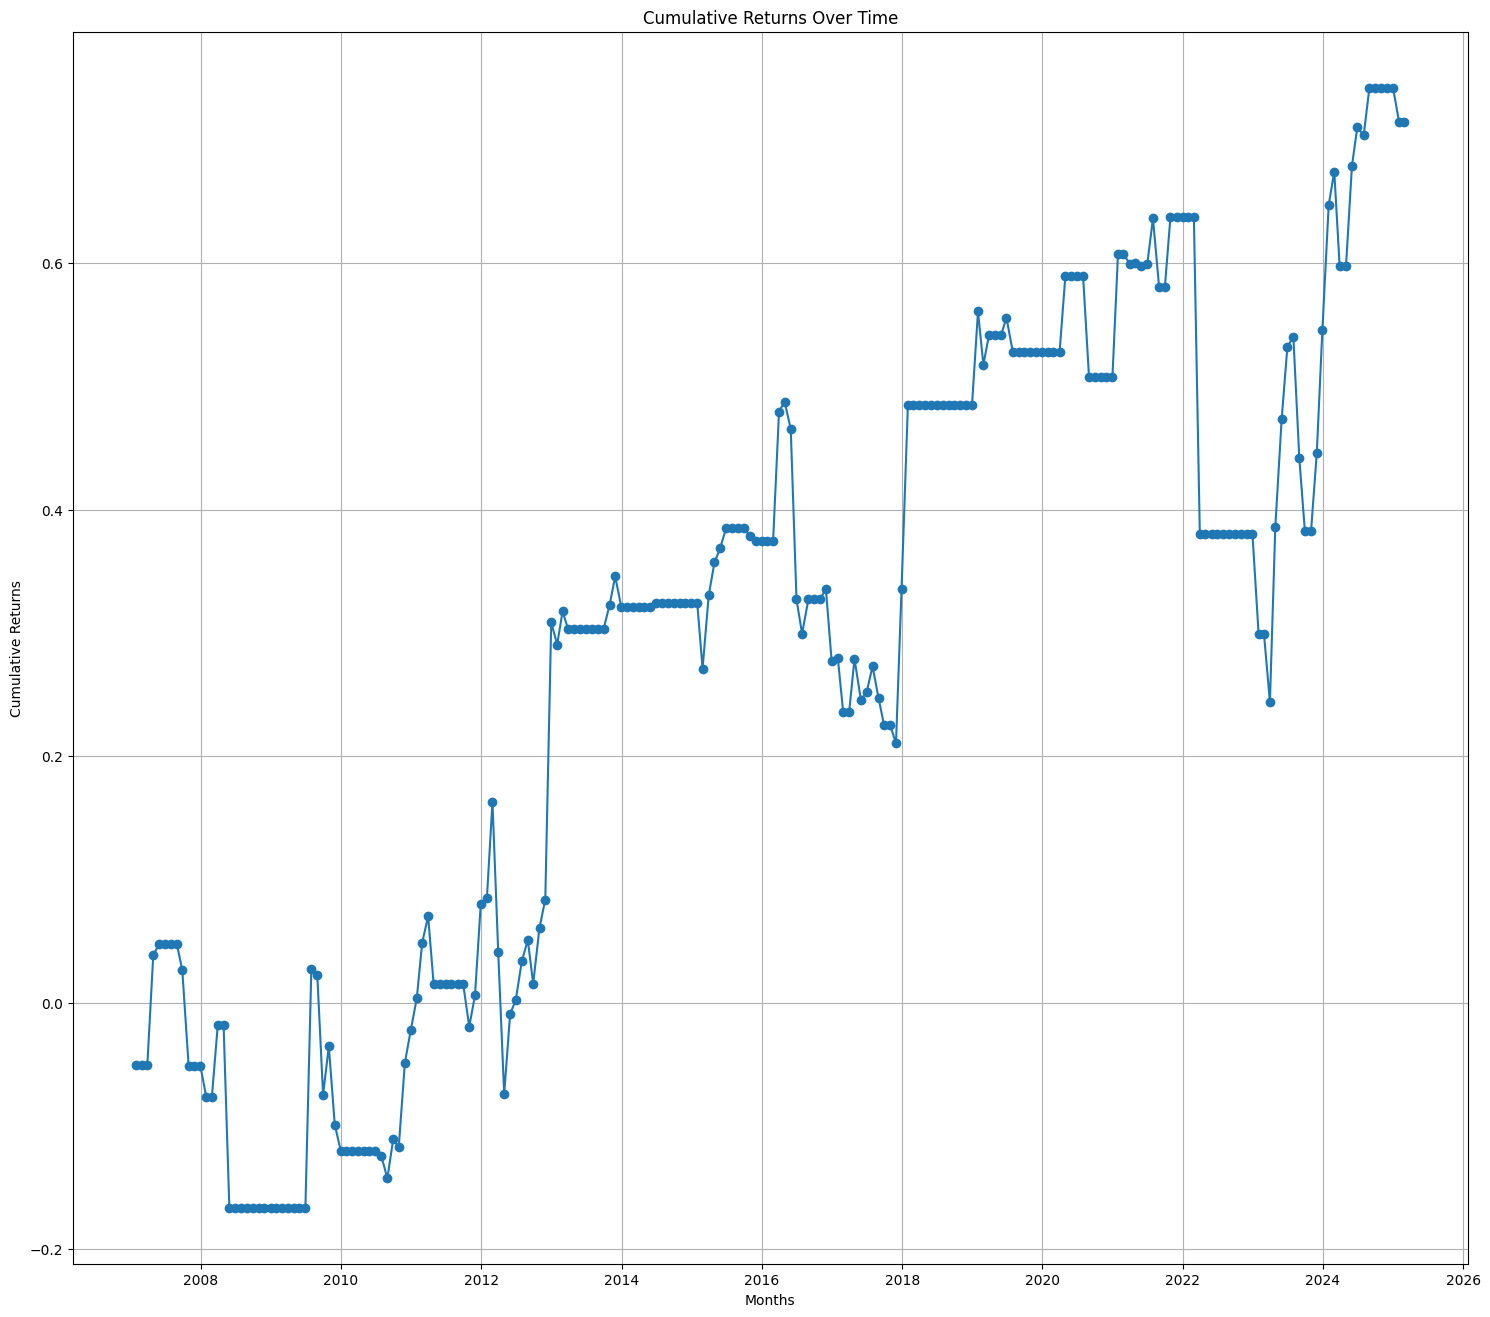

In [16]:
plot_returns(returns=returns)